In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, shapiro, levene

In [2]:
sns.set(font_scale=1,
        style="whitegrid",
        rc={'figure.figsize': (7, 4)})

### Задание 1
#### Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать  retention игроков (по дням от даты регистрации игрока) данные лежат в папке shared

In [3]:
# Загружаю данные, преобразовываю формат регистрации к дате
df_reg = pd.read_csv('problem1-reg_data.csv', sep=';')

In [4]:
df_reg['reg_ts'] = pd.to_datetime(df_reg['reg_ts'], unit='s')
df_reg['reg_ts'] = df_reg.reg_ts.dt.date
df_reg['reg_ts'] = pd.to_datetime(df_reg['reg_ts'])

In [5]:
df_reg.tail()

,reg_ts,uid
999995,2020-09-23,1110618
999996,2020-09-23,1110619
999997,2020-09-23,1110620
999998,2020-09-23,1110621
999999,2020-09-23,1110622


In [6]:
# Загружаю данные, преобразовываю формат регистрации к дате
df_auth = pd.read_csv('problem1-auth_data.csv', sep=';')

In [7]:
df_auth.auth_ts = pd.to_datetime(df_auth['auth_ts'], unit='s')
df_auth['auth_ts'] = df_auth.auth_ts.dt.date
df_auth.auth_ts = pd.to_datetime(df_auth['auth_ts'])

In [8]:
df_auth.head()

,auth_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,1999-07-25,2
3,1999-07-31,2
4,1999-08-05,2


In [9]:
# Сравниваю количество уникальных ID пользователей
df_reg.uid.nunique()

1000000

In [10]:
df_auth.uid.nunique()

1000000

In [11]:
def retention(min_date='2019-09-23'):
    
    
    """
    Функция для подсчета удержания пользователей, на вход принимает дату в формате 'ГГГГ-ММ-ДД' 
    Сейчас выбрана дата на год старше от самой новой регистрации. 
    Данные за 90-е годы не вижу смысла смотреть, тк на дворе 2023, 
    но никто не мешает закинуть любую дату в функцию. 
    По 2019-09-23 процент удержания 3-4%, что является крайне низким. 
    Даже на первый день, после регистрации, нет 10%, что говорит о неинтересном геймплее, 
    либо о перегруженных механиках, отталкивающих новичков. Но если посмотреть удержание 60 дня, 
    то можно увидеть игроков, которых игра зацепила, В целом, начинаю с 1 и по 60 день, 
    процент удердания примерно одинаковый, значит что-то в игре да есть, раз люди не бросают ее полностью.
    """
    
    
    df_var1_df1 = df_reg[(df_reg.reg_ts == min_date)]
    df_word = df_auth.merge(df_var1_df1, how='right', on='uid')
    df_word.head()
    if (df_word.auth_ts.max() - pd.to_datetime(min_date)).days > 61:
        
        day_0 = df_word.auth_ts.min()
        day_1 = df_word.auth_ts.min() + pd.DateOffset(days=1)
        day_2 = df_word.auth_ts.min() + pd.DateOffset(days=2)
        day_3 = df_word.auth_ts.min() + pd.DateOffset(days=3)
        day_7 = df_word.auth_ts.min() + pd.DateOffset(days=7)
        day_14 = df_word.auth_ts.min() + pd.DateOffset(days=14)
        day_30 = df_word.auth_ts.min() + pd.DateOffset(days=30)
        day_60 = df_word.auth_ts.min() + pd.DateOffset(months=2)
        
        lst = dict({'day_0': day_0, "day_1": day_1, "day_2": day_2, 
                    "day_3": day_3, "day_7": day_7, 'day_14': day_14, 
                    "day_30": day_30, "day_60": day_60})
        lst2 = []
        
        for i in lst.values():
            lst2.append(df_word[df_word.auth_ts == i].uid.nunique())
            
        d = {'date': lst.values(), 'day': lst.keys(), 'count': lst2}
        df_work = pd.DataFrame(data=d)
        df_work['retention'] = df_work['count'].div(df_work['count'][0]).mul(100)
        
        sns.relplot(x=df_work['day'][1:], y=df_work['retention'][1:], kind="line", height=5, aspect=2)
        plt.axhline(y=np.median(df_work['retention']), color='red', linestyle='--', linewidth=2, label='Avg') 
        plt.legend(loc='upper right')
        print('ok')
        print(min_date)
        print(df_work)
        
    elif (df_word.auth_ts.max() - pd.to_datetime(min_date)).days > 30:
        
        day_0 = df_word.auth_ts.min()
        day_1 = df_word.auth_ts.min() + pd.DateOffset(days=1)
        day_2 = df_word.auth_ts.min() + pd.DateOffset(days=2)
        day_3 = df_word.auth_ts.min() + pd.DateOffset(days=3)
        day_7 = df_word.auth_ts.min() + pd.DateOffset(days=7)
        day_14 = df_word.auth_ts.min() + pd.DateOffset(days=14)
        day_30 = df_word.auth_ts.min() + pd.DateOffset(days=30)
        
        lst = dict({'day_0': day_0, "day_1": day_1, "day_2": day_2, 
                    "day_3": day_3, "day_7": day_7, 'day_14': day_14, 
                    "day_30": day_30})
        lst2 = []
        
        for i in lst.values():
            lst2.append(df_word[df_word.auth_ts == i].uid.nunique())
            
        d = {'date': lst.values(), 'day': lst.keys(), 'count': lst2}
        df_work = pd.DataFrame(data=d)
        df_work['retention'] = df_work['count'].div(df_work['count'][0]).mul(100)
        
        sns.relplot(x=df_work['day'][1:], y=df_work['retention'][1:], kind="line", height=5, aspect=2)
        plt.axhline(y=np.median(df_work['retention']), color='red', linestyle='--', linewidth=2, label='Avg') 
        plt.legend(loc='upper right')
        print('ok30')        
        print(df_work)
        

    elif (df_word.auth_ts.max() - pd.to_datetime(min_date)).days > 7 < 30:
        
        day_0 = df_word.auth_ts.min()
        day_1 = df_word.auth_ts.min() + pd.DateOffset(days=1)
        day_2 = df_word.auth_ts.min() + pd.DateOffset(days=2)
        day_3 = df_word.auth_ts.min() + pd.DateOffset(days=3)
        day_7 = df_word.auth_ts.min() + pd.DateOffset(days=7)
        day_14 = df_word.auth_ts.min() + pd.DateOffset(days=14)
        
        lst = dict({'day_0': day_0, "day_1": day_1, "day_2": day_2, 
                    "day_3": day_3, "day_7": day_7, 'day_14': day_14})
        lst2 = []
        
        for i in lst.values():
            lst2.append(df_word[df_word.auth_ts == i].uid.nunique())
            
        d = {'date': lst.values(), 'day': lst.keys(), 'count': lst2}
        df_work = pd.DataFrame(data=d)
        df_work['retention'] = df_work['count'].div(df_work['count'][0]).mul(100)
        
        sns.relplot(x=df_work['day'][1:], y=df_work['retention'][1:], kind="line", height=5, aspect=2)
        plt.axhline(y=np.median(df_work['retention']), color='red', linestyle='--', linewidth=2, label='Avg') 
        plt.legend(loc='upper right')
        print('ok7')
        print(df_work)
    else:
        print('Davai daty drygyu, tyt smotret nechego')


In [12]:
print(retention.__doc__)


    Функция для подсчета удержания пользователей, на вход принимает дату в формате 'ГГГГ-ММ-ДД' 
    Сейчас выбрана дата на год старше от самой новой регистрации. 
    Данные за 90-е годы не вижу смысла смотреть, тк на дворе 2023, 
    но никто не мешает закинуть любую дату в функцию. 
    По 2019-09-23 процент удержания 3-4%, что является крайне низким. 
    Даже на первый день, после регистрации, нет 10%, что говорит о неинтересном геймплее, 
    либо о перегруженных механиках, отталкивающих новичков. Но если посмотреть удержание 60 дня, 
    то можно увидеть игроков, которых игра зацепила, В целом, начинаю с 1 и по 60 день, 
    процент удердания примерно одинаковый, значит что-то в игре да есть, раз люди не бросают ее полностью.
    


ok
2019-09-23
        date     day  count   retention
0 2019-09-23   day_0    900  100.000000
1 2019-09-24   day_1     14    1.555556
2 2019-09-25   day_2     29    3.222222
3 2019-09-26   day_3     35    3.888889
4 2019-09-30   day_7     52    5.777778
5 2019-10-07  day_14     42    4.666667
6 2019-10-23  day_30     30    3.333333
7 2019-11-23  day_60     11    1.222222


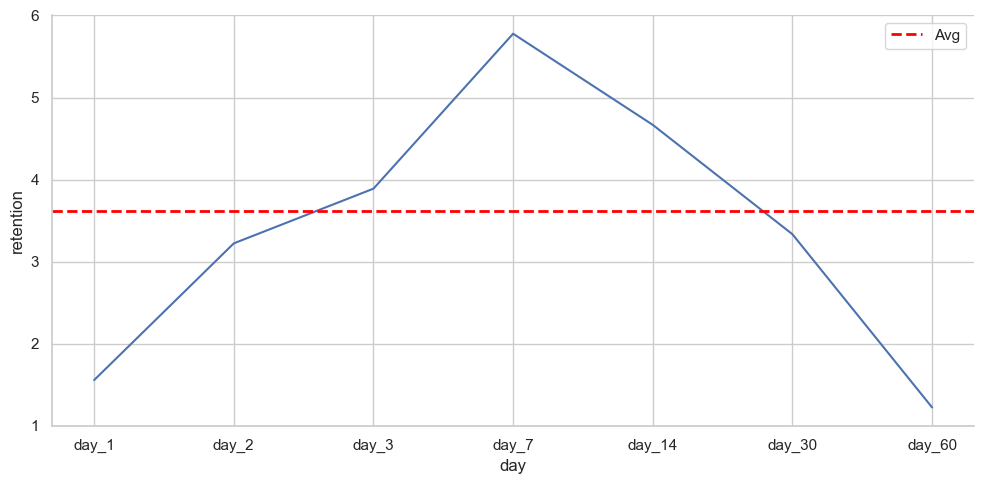

In [13]:
retention()

### Задание 2
##### Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

##### Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [14]:
# Подгружаем данные, смотрим
ab = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/SOkIsD5A8xlI7Q', sep=';')

In [15]:
ab.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [16]:
# Проверяем на пропущенные значения
ab.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [17]:
# Разделяем на контрольную и тестовые группы
contr = ab.query('testgroup == "a"')
contr.head(3)

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a


In [18]:
test = ab.query('testgroup != "a"')
test.head(3)

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b


In [19]:
# Смотрим описательную статистику и уже видим инетерсное.
# Больше 75% данных в обеих группах равняются нулю.
# Так же сильно отличается максимальное значение суммы заказа.
ab.groupby('testgroup').agg({'revenue': 'describe'})

revenue                                                    
              count       mean         std  min  25%  50%  75%      max
testgroup                                                              
a          202103.0  25.413720  920.768137  0.0  0.0  0.0  0.0  37433.0
b          202667.0  26.751287  287.324162  0.0  0.0  0.0  0.0   4000.0

Ниже распределение данных в контрольной и тестовой группах с нулевыми заказами и без

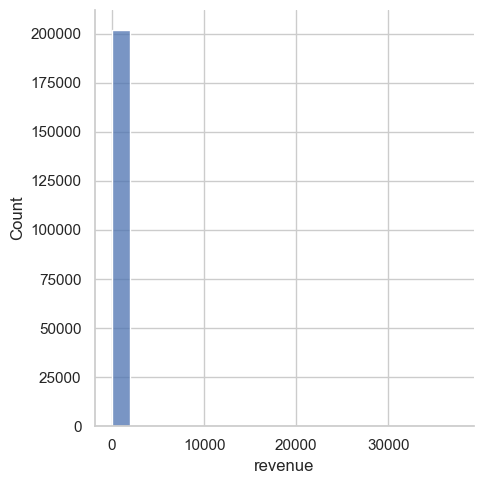

In [20]:
sns.displot(contr.revenue)

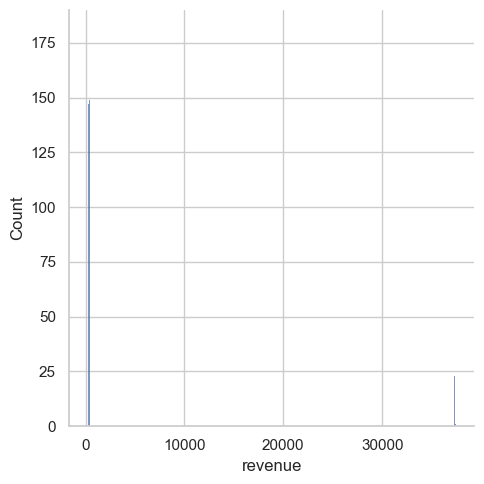

In [21]:
sns.displot(contr.query('revenue > 0').revenue)

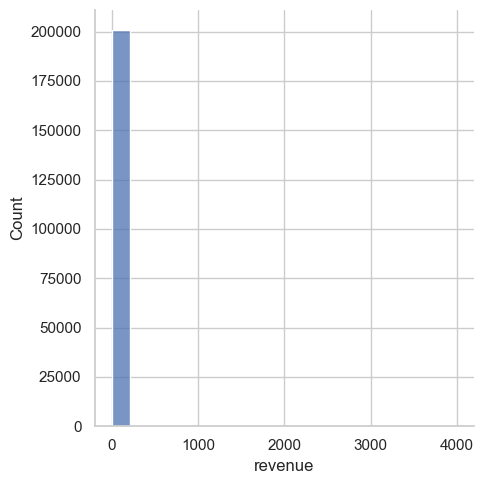

In [22]:
sns.displot(test.revenue)

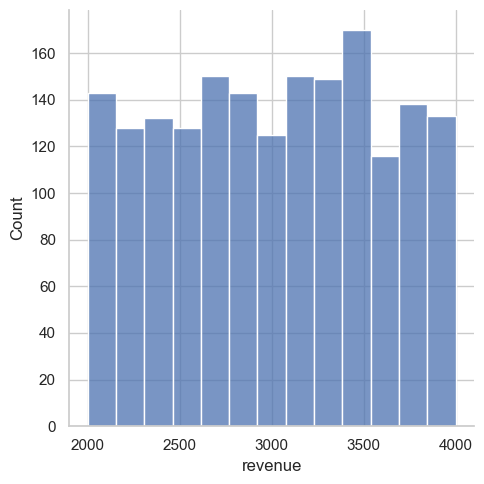

In [23]:
sns.displot(test.query('revenue > 0').revenue)

По графикам видно, что в тестовой группе все данные расположились в диапазоне от 1500 до 4500, 
а в контрольной есть некоторое количество с суммами примерно в 35000

In [24]:
ab.groupby(['testgroup']).revenue.sum()

testgroup
a    5136189
b    5421603
Name: revenue, dtype: int64

In [25]:
chi2_contingency(ab.groupby(['testgroup']).revenue.sum())

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([5136189., 5421603.]))

Различий по выручке между группами не выявлено

###### Так как у нас есть данные только по пользователям и выручке, то и метрики будут соответсвующие. Сравним ARPU, ARRPU и конверсию

### conversion

In [26]:
# Посмотрим конверсию в группах, а так же проверим, есть ли статзначимые различия.
# Н0 - в группах нет отличий
# Н1 - в группах есть стат значимые отличия
# З афиксируем порог значимости в 0.05
ab.query('revenue > 0').groupby('testgroup').user_id.count() / ab.groupby('testgroup').user_id.count() * 100

testgroup
a    0.953969
b    0.890624
Name: user_id, dtype: float64

In [27]:
# Делаем таблицу собряженности
chi_table = pd.DataFrame({'control': [contr.query('revenue > 0').user_id.count(), contr.user_id.count()],
                          'test': [test.query('revenue > 0').user_id.count(), test.user_id.count()]})
chi_table

,control,test
0,1928,1805
1,202103,202667


In [28]:
chi2_contingency([chi_table['control'], chi_table['test']])

Chi2ContingencyResult(statistic=4.294148751290091, pvalue=0.03824373651044168, dof=1, expected_freq=array([[  1864.48501725, 202166.51498275],
       [  1868.51498275, 202603.48501725]]))

По результатам Хи-теста выявленые статзначимые отличия. В контрольной группе на 5% меньше конверсия

### ARPU

In [29]:
# Посчитаем ARPU на пользователя и так же сравним отличаются ли группы статистически.
# Н0 - отличий в группах нет
# Н1 - Группы статистически отличаются
# Для проверки отличий будем использовать t-тест,
# тк распределение гомогенно и данных много 
# p-уровень значимости возьмем 0.05

In [30]:
contr.revenue.sum() / contr.user_id.count()

25.413719736965806

In [31]:
test.revenue.sum() / test.user_id.count()

26.75128659327863

In [32]:
# Процентное различие между двумя группами
(test.revenue.sum() / test.user_id.count()) / (contr.revenue.sum() / contr.user_id.count())

1.052631683600699

In [33]:
levene(contr.revenue, test.revenue)

LeveneResult(statistic=0.3896289474701388, pvalue=0.5324948591043842)

In [34]:
ttest_ind(contr.revenue, test.revenue)

Ttest_indResult(statistic=-0.6242026493616787, pvalue=0.532494858971837)

Тест Стьюдента не выявил стат значимых отличий, значит мы не может отвергнуть нулевую гипотезу

### ARRPU

In [35]:
# Посчитаем ARRPU  на пользователя в группах 
# Н0 - отличий в группах нет
# Н1 - Группы статистически отличаются
# Для проверки отличий будем использовать t-test c поправкой Уэлча,
# тк сильно различается дисперсия, а нормальность сгладит большое количетво данных
# p-уровень значимости возьмем 0.05

In [36]:
contr.query('revenue > 0').revenue.sum() / contr.query('revenue > 0').user_id.count()

2663.9984439834025

In [37]:
test.query('revenue > 0').revenue.sum() / test.query('revenue > 0').user_id.count()

3003.6581717451522

In [38]:
[shapiro(test.query('revenue > 0').revenue),
 shapiro(contr.query('revenue > 0').revenue)]

[ShapiroResult(statistic=0.9583134651184082, pvalue=2.4928981530329e-22),
 ShapiroResult(statistic=0.26679253578186035, pvalue=0.0)]

In [39]:
((test.query('revenue > 0').revenue.sum() / test.query('revenue > 0').user_id.count()) / \
 (contr.query('revenue > 0').revenue.sum() / contr.query('revenue > 0').user_id.count()))

1.1274999722799635

In [40]:
levene(contr.query('revenue > 0').revenue, test.query('revenue > 0').revenue)

LeveneResult(statistic=80.85567421779912, pvalue=3.779689868667878e-19)

In [41]:
ttest_ind(contr.query('revenue > 0').revenue, test.query('revenue > 0').revenue, equal_var=False)

Ttest_indResult(statistic=-1.644630266430084, pvalue=0.10020780398916018)

T-test c поправкой Уэлча не показал статистически значимых различий.

### После всех проверок считаю, что эксперимент был проведен некорректно. Возможно были убраны акционные товары большой стомости, тк таких данных не присутвует, либо данные собиралиcь неправильно, либо плохо настроена системи сплитования. Стоит еще раз все проверить и провести А/Б тест повторно с корректировками. По текущим данным, раскатывать фичу на всех не стоит.


### Задание 3
#### В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

#### Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

Для оценки результатов последнего прошедшего события в игре "Plants & Gardens" можно использовать следующие метрики:

1. **Уровень завершения события**: Подсчитать процент игроков, которые успешно завершили событие, пройдя все необходимые уровни. Это позволит оценить общую сложность и доступность события для игроков.
2. **Время завершения события**: Измерить среднее время, требуемое игрокам для завершения события. Более короткое время может указывать на легкость события, в то время как более долгое время может свидетельствовать о его сложности.
3. **Количество завершенных уровней**: Оценить среднее количество уровней, которые игроки завершили в рамках события. Это может помочь определить, на каком этапе игроки чаще всего теряют интерес или возникают трудности.
4. **Конверсия внутриигровых покупок**: Посмотреть на то, какие дополнительные монеты или бонусы покупали игроки во время события. Это может показать, насколько событие стимулировало монетизацию игры.
5. **Отзывы игроков**: Проанализируйте отзывы игроков о событии. Посмотреть на положительные и отрицательные комментарии, чтобы понять, что игроки оценили или не оценили в событии.
6. **Удержание игроков**: Изучить, сколько игроков вернулись в игру после завершения события. Это позволит определить, насколько событие удерживает аудиторию и стимулирует их активность.
7. **ROI (возврат на инвестиции)**: Если проводилась рекламная или маркетинговая кампания для события, оценить ROI, сравнив затраты на продвижение с доходами, полученными от события.

Эти метрики помогут оценить успешность и влияние последнего события в игре "Plants & Gardens" на игровой опыт и финансовую производительность игры.

Если вы усложнить механику события, включив откат на несколько уровней назад при неудачной попытке выполнения, это повлияет на набор метрик оценки результата. Новая механика может повлиять на игровой процесс и опыт игроков. Вот какие метрики стоит учесть:

1. **Уровень завершения события**: Поскольку теперь игроки могут откатываться на несколько уровней назад, уровень завершения события становится более сложным показателем. Возможно, придется пересмотреть, как определять успешное завершение события.
2. **Среднее количество попыток на уровне**: Оценить, сколько попыток среднестатистический игрок предпринимает для завершения каждого уровня. Это может показать, насколько сложными стали уровни из-за механики отката.
3. **Время завершения события**: Измерить, сколько времени игроки тратят на прохождение события с учетом откатов. Это может дать представление о времени, потраченном на преодоление сложностей.
4. **Отток игроков**: Следить за тем, сколько игроков бросило событие из-за сложности механики отката. Оценить, как это влияет на общий отток игроков из игры.
5. **Удержание игроков после откатов**: Изучите, как механика отката влияет на удержание игроков. Сравнить, сколько игроков возвращается после неудачных попыток с тем, как было раньше.
6. **Уровень монетизации**: Посмотреть на то, как механика отката влияет на уровень монетизации. Возможно, игроки будут склонны больше тратить на покупку дополнительных жизней или бонусов из-за сложности.
7. **Отзывы игроков**: Анализируйте отзывы игроков о новой механике. Отзывы могут дать представление о том, как игроки воспринимают эту изменение и какие трудности они испытывают.

В целом, механика отката влияет на сложность и игровой опыт, поэтому метрики следует адаптировать для учета этих изменений и оценки их воздействия на результаты события и общий успех игры.